# Titanic (2)

In [1]:
import pandas as pd
titanic = pd.read_csv("./data/train.csv")

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

def compute_score(clf, X, y):
    xval = cross_val_score(clf, X, y, cv = 5)
    return xval.mean() *100

lr1 = LogisticRegression()

## Ajoutons la classe aux caractéristiques (Reg. Log)

Analyse de la carractéristique Pclass

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plt_feature(feature, bins = 30):
    m = titanic[titanic.Survived == 0][feature].dropna()
    s = titanic[titanic.Survived == 1][feature].dropna()
    plt.hist([m, s], label=['Morts', 'Survivants'], bins = bins)
    plt.legend(loc = 'upper left')
    plt.title('Distribution relative de %s' %feature)
    plt.show()
plt_feature('Pclass')

/opt/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Prépare un modèle avec les classes divisées en 3 colonnes

In [3]:
def Prepare_Modele_2(X):
    target = X.Survived
    to_del = ['Name', 'Age', 'Cabin', 'Embarked', 'Survived', 'Ticket', 'Sex']
    for col in to_del : del X[col]
    return X, target

In [4]:
X, y = Prepare_Modele_2(titanic.copy())

In [5]:
X.head(5)

,PassengerId,Pclass,SibSp,Parch,Fare
0,1,3,1,0,7.2500
1,2,1,1,0,71.2833
2,3,3,0,0,7.9250
3,4,1,1,0,53.1000
4,5,3,0,0,8.0500


### Calculons notre nouveau score

In [6]:
compute_score(lr1, X, y)

67.91378923301654

## Ajoutons le sexe aux caractéristiques (Reg. Log)

Analysons la carractéristique Sex

Text(0.5,1,'Survivants par sexe')

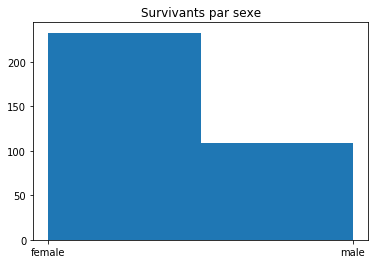

In [7]:
morts = titanic[titanic.Survived == 0]['Sex'].dropna()
vivants = titanic[titanic.Survived == 1]['Sex'].dropna()

plt.hist(vivants, label=['Vivants'], bins = 2)
plt.title('Survivants par sexe')

Text(0.5,1,'Décès par sexe')

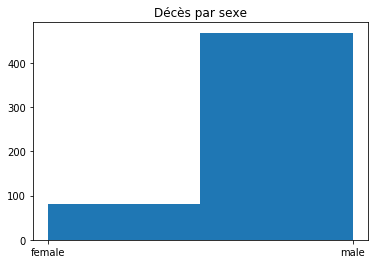

In [8]:
plt.hist(morts, label=['Morts'], bins = 2)
plt.title('Décès par sexe')

In [ ]:
def Prepare_Modele_3_Test(X):
    target = X.Survived
    to_del = ['Name', 'Age', 'Cabin', 'Embarked', 'Survived', 'Ticket']
    for col in to_del : del X[col]
    return X, target
X, y = Prepare_Modele_3_Test(titanic.copy())
X.head(5)
compute_score(lr1, X, y)

## Une erreur bien justifiée ! il faut des caractéristiques numériques ... transformons le sexe en données numériques donc !

In [9]:
def Prepare_Modele_3(X):
    target = X.Survived
    sexe = pd.get_dummies(X['Sex'], prefix='sex')
    X = X.join(sexe)
    to_del = ['Name', 'Age', 'Cabin', 'Embarked', 'Survived', 'Ticket', 'Sex']
    for col in to_del : del X[col]
    return X, target

In [10]:
X, y = Prepare_Modele_3(titanic.copy())

In [11]:
X.head(5)

,PassengerId,Pclass,SibSp,Parch,Fare,sex_female,sex_male
0,1,3,1,0,7.2500,0,1
1,2,1,1,0,71.2833,1,0
2,3,3,0,0,7.9250,1,0
3,4,1,1,0,53.1000,1,0
4,5,3,0,0,8.0500,0,1


### Calculons notre nouveau score

In [12]:
compute_score(lr1, X, y)

79.34757128818596